In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A company released new SUV car in the market for the cheaper cost. To increase the sales of the newly released SUV car, company advertised in the social network. From the social network users, who saw the advertisement, the company collected the information such as gender, age, approximate salary and purchased or not. This information is available in the form of data set (Social_Network_Ads.csv).  Design a kernel SVM classifier to find number of correct and incorrect predictions. Visualize the training and test set results. 

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
#1.Polynomial kernel

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly',degree=3)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred=classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
cm=confusion_matrix(y_pred,y_test)

In [12]:
cm

array([[67, 13],
       [ 1, 19]], dtype=int64)

In [13]:
tp=cm[0][0]
tn=cm[1][1]
fn=cm[0][1]
fp=cm[1][0]
acc=(tp+tn)/(tp+tn+fp+fn)
miss=1-acc
spec=tn/(tn+fp)
preval=(tp+fn)/(tp+fp+tn+fn)
precesion=tp/(tp+fp)
fprate=fp/(fp+tn)

In [14]:
print("Accuracy:",acc)
print("Misclassification:",miss)
print("Specificity:",spec)
print("Prevalence:",preval)
print("Precession:",precesion)
print("False Positive rate:",fprate)

Accuracy: 0.86
Misclassification: 0.14
Specificity: 0.95
Prevalence: 0.8
Precession: 0.9852941176470589
False Positive rate: 0.05


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


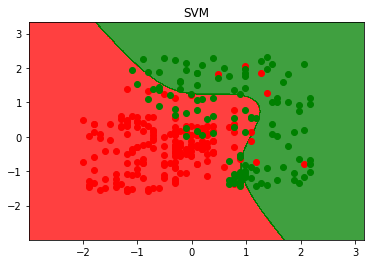

In [15]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


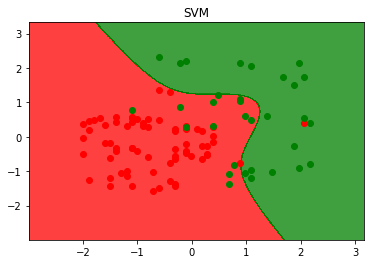

In [16]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()

In [17]:
#2.Gaussian kernel

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [21]:
tp=cm[0][0]
tn=cm[1][1]
fn=cm[0][1]
fp=cm[1][0]
acc=(tp+tn)/(tp+tn+fp+fn)
miss=1-acc
spec=tn/(tn+fp)
preval=(tp+fn)/(tp+fp+tn+fn)
precesion=tp/(tp+fp)
fprate=fp/(fp+tn)

In [22]:
print("Accuracy:",acc)
print("Misclassification:",miss)
print("Specificity:",spec)
print("Prevalence:",preval)
print("Precession:",precesion)
print("False Positive rate:",fprate)

Accuracy: 0.93
Misclassification: 0.06999999999999995
Specificity: 0.8787878787878788
Prevalence: 0.67
Precession: 0.9411764705882353
False Positive rate: 0.12121212121212122


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


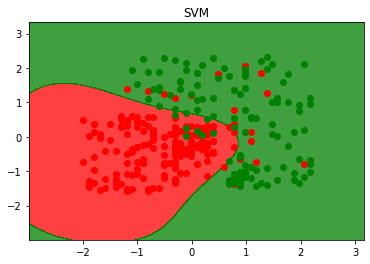

In [23]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


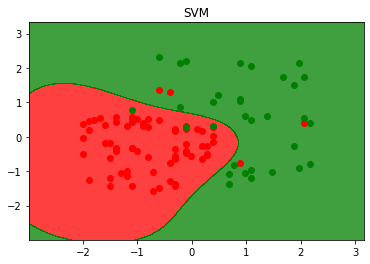

In [24]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()